# 날씨 데이터 가공

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import seaborn as sns

In [2]:
f = open('weather.csv')
data = csv.reader(f)
header = next(data)
header + ['체감온도(°C)', '불쾌지수']
weather = []

for row in data:
    for i in range(1,2):
        row[i] = int(row[i].replace('-',''))
    for i in range(2, 7):
        row[i] = float(row[i])
    weather.append(row)

In [3]:
weather

[['서울', 20200101, -2.2, 0.1, 0.6, 64.4, 0.0],
 ['서울', 20200102, 1.0, 0.0, 1.2, 65.4, 0.0],
 ['서울', 20200103, -0.1, 0.0, 1.7, 56.9, 0.0],
 ['서울', 20200104, 1.2, 0.0, 1.9, 50.8, 0.0],
 ['서울', 20200105, 1.3, 0.0, 1.1, 45.6, 0.0],
 ['서울', 20200106, 3.1, 1.8, 3.1, 65.4, 0.0],
 ['서울', 20200107, 6.3, 46.3, 4.0, 95.0, 0.0],
 ['서울', 20200108, 2.4, 11.6, 3.3, 86.1, 0.0],
 ['서울', 20200109, -1.2, 0.0, 2.3, 65.3, 0.0],
 ['서울', 20200110, -0.6, 0.0, 1.5, 62.9, 0.0],
 ['서울', 20200111, -0.1, 0.0, 1.9, 60.9, 0.0],
 ['서울', 20200112, -1.0, 0.0, 2.4, 61.5, 0.0],
 ['서울', 20200113, -2.9, 0.0, 2.3, 51.0, 0.0],
 ['서울', 20200114, -2.3, 0.0, 1.6, 45.3, 0.0],
 ['서울', 20200115, -2.7, 0.0, 1.9, 44.8, 0.0],
 ['서울', 20200116, -1.7, 0.0, 1.6, 43.0, 0.0],
 ['서울', 20200117, -0.6, 0.0, 1.5, 43.9, 0.0],
 ['서울', 20200118, 0.3, 0.0, 1.8, 48.1, 0.0],
 ['서울', 20200119, 1.9, 0.6, 2.2, 62.8, 0.3],
 ['서울', 20200120, 0.7, 0.0, 2.5, 46.8, 0.0],
 ['서울', 20200121, -0.4, 0.0, 1.4, 36.9, 0.0],
 ['서울', 20200122, 3.0, 0.0, 1.7, 36.0, 0.

# 체감온도 구하기(7) [1-3월, 5-8월 적용]

In [4]:
for i in weather:
    b = int(str(i[1]))
    p_temp = 13.12 + (0.6215 * i[2]) - (11.37 * (i[4] ** 0.16)) + (0.3965 * (i[4] ** 0.16))
    if b <= 20200331:
        i.append(round(p_temp, 2))
    elif 20200501 <= b <= 20200831:
        i.append(round(p_temp, 2))
    else:
        i.append(0)
        #i.append(np.nan)

In [5]:
weather

[['서울', 20200101, -2.2, 0.1, 0.6, 64.4, 0.0, 1.64],
 ['서울', 20200102, 1.0, 0.0, 1.2, 65.4, 0.0, 2.44],
 ['서울', 20200103, -0.1, 0.0, 1.7, 56.9, 0.0, 1.11],
 ['서울', 20200104, 1.2, 0.0, 1.9, 50.8, 0.0, 1.71],
 ['서울', 20200105, 1.3, 0.0, 1.1, 45.6, 0.0, 2.79],
 ['서울', 20200106, 3.1, 1.8, 3.1, 65.4, 0.0, 1.9],
 ['서울', 20200107, 6.3, 46.3, 4.0, 95.0, 0.0, 3.34],
 ['서울', 20200108, 2.4, 11.6, 3.3, 86.1, 0.0, 1.33],
 ['서울', 20200109, -1.2, 0.0, 2.3, 65.3, 0.0, -0.16],
 ['서울', 20200110, -0.6, 0.0, 1.5, 62.9, 0.0, 1.04],
 ['서울', 20200111, -0.1, 0.0, 1.9, 60.9, 0.0, 0.9],
 ['서울', 20200112, -1.0, 0.0, 2.4, 61.5, 0.0, -0.12],
 ['서울', 20200113, -2.9, 0.0, 2.3, 51.0, 0.0, -1.22],
 ['서울', 20200114, -2.3, 0.0, 1.6, 45.3, 0.0, -0.14],
 ['서울', 20200115, -2.7, 0.0, 1.9, 44.8, 0.0, -0.72],
 ['서울', 20200116, -1.7, 0.0, 1.6, 43.0, 0.0, 0.23],
 ['서울', 20200117, -0.6, 0.0, 1.5, 43.9, 0.0, 1.04],
 ['서울', 20200118, 0.3, 0.0, 1.8, 48.1, 0.0, 1.25],
 ['서울', 20200119, 1.9, 0.6, 2.2, 62.8, 0.3, 1.85],
 ['서울', 2020012

# 불쾌지수 구하기(9) [6-8월 적용]

In [6]:
for i in weather:
    b = int(str(i[1]))
    DI = (9 / 5 * i[2]) - 0.55 * ((1 - (i[5] / 100)) * ((9 / 5 * i[2]) - 26)) + 32
    if 20200601 <= b <= 20200831:
        i.append(round(DI, 2))
    else:
        i.append(0)
        #i.append(np.nan)

In [7]:
weather

[['서울', 20200101, -2.2, 0.1, 0.6, 64.4, 0.0, 1.64, 0],
 ['서울', 20200102, 1.0, 0.0, 1.2, 65.4, 0.0, 2.44, 0],
 ['서울', 20200103, -0.1, 0.0, 1.7, 56.9, 0.0, 1.11, 0],
 ['서울', 20200104, 1.2, 0.0, 1.9, 50.8, 0.0, 1.71, 0],
 ['서울', 20200105, 1.3, 0.0, 1.1, 45.6, 0.0, 2.79, 0],
 ['서울', 20200106, 3.1, 1.8, 3.1, 65.4, 0.0, 1.9, 0],
 ['서울', 20200107, 6.3, 46.3, 4.0, 95.0, 0.0, 3.34, 0],
 ['서울', 20200108, 2.4, 11.6, 3.3, 86.1, 0.0, 1.33, 0],
 ['서울', 20200109, -1.2, 0.0, 2.3, 65.3, 0.0, -0.16, 0],
 ['서울', 20200110, -0.6, 0.0, 1.5, 62.9, 0.0, 1.04, 0],
 ['서울', 20200111, -0.1, 0.0, 1.9, 60.9, 0.0, 0.9, 0],
 ['서울', 20200112, -1.0, 0.0, 2.4, 61.5, 0.0, -0.12, 0],
 ['서울', 20200113, -2.9, 0.0, 2.3, 51.0, 0.0, -1.22, 0],
 ['서울', 20200114, -2.3, 0.0, 1.6, 45.3, 0.0, -0.14, 0],
 ['서울', 20200115, -2.7, 0.0, 1.9, 44.8, 0.0, -0.72, 0],
 ['서울', 20200116, -1.7, 0.0, 1.6, 43.0, 0.0, 0.23, 0],
 ['서울', 20200117, -0.6, 0.0, 1.5, 43.9, 0.0, 1.04, 0],
 ['서울', 20200118, 0.3, 0.0, 1.8, 48.1, 0.0, 1.25, 0],
 ['서울', 2020

# 숫자 데이터 모두 int로 인식시키기, '배달전문업체', '심부름', '야식' 데이터 제외

In [8]:
import csv

f = open('seoul2020.csv', encoding='UTF8')
data = csv.reader(f)
deliv = []

for row in data:
    for i in range(1) :
        if row[i] == '\ufeff2020-01-01':
            row[i] = int(20200101)
        else:
            row[i] = int(row[i].replace('-',''))
    for i in range(4, 5):
        row[i] = int(row[i])
        
    if row[1] == '배달전문업체' or row[1] == '심부름' or row[1] == '야식':
        continue
    else:
        deliv.append(row)

In [9]:
deliv

[[20200101, '도시락', '서울특별시', '관악구', 1],
 [20200101, '도시락', '서울특별시', '양천구', 2],
 [20200101, '돈까스/일식', '서울특별시', '구로구', 22],
 [20200101, '돈까스/일식', '서울특별시', '금천구', 5],
 [20200101, '돈까스/일식', '서울특별시', '노원구', 14],
 [20200101, '돈까스/일식', '서울특별시', '도봉구', 20],
 [20200101, '돈까스/일식', '서울특별시', '양천구', 17],
 [20200101, '돈까스/일식', '서울특별시', '은평구', 18],
 [20200101, '분식', '서울특별시', '구로구', 316],
 [20200101, '분식', '서울특별시', '금천구', 233],
 [20200101, '분식', '서울특별시', '노원구', 69],
 [20200101, '분식', '서울특별시', '도봉구', 89],
 [20200101, '분식', '서울특별시', '영등포구', 51],
 [20200101, '분식', '서울특별시', '은평구', 90],
 [20200101, '아시안/양식', '서울특별시', '구로구', 8],
 [20200101, '아시안/양식', '서울특별시', '금천구', 64],
 [20200101, '아시안/양식', '서울특별시', '도봉구', 9],
 [20200101, '아시안/양식', '서울특별시', '동작구', 1],
 [20200101, '아시안/양식', '서울특별시', '영등포구', 90],
 [20200101, '아시안/양식', '서울특별시', '은평구', 16],
 [20200101, '족발/보쌈', '서울특별시', '구로구', 151],
 [20200101, '족발/보쌈', '서울특별시', '금천구', 112],
 [20200101, '족발/보쌈', '서울특별시', '도봉구', 43],
 [20200101, '족발/보쌈', '서울특별시', '동작구', 18],
 [

# 일 별 업종별 배달 총 건수

In [10]:
deliv_case = []
f_date = 20200101

lunchbox = 0
j_food = 0
bunsik = 0
asian = 0
jokbal = 0
c_food = 0
steamed = 0
chicken = 0
dissert = 0
junk_food = 0
pizza = 0
k_food = 0
sushi = 0
total = 0

for i in deliv:
    if f_date == i[0]:
        if i[1] == '도시락':
            lunchbox += i[4]
        elif i[1] == '돈까스/일식':
            j_food += i[4]
        elif i[1] == '분식':
            bunsik += i[4]
        elif i[1] == '아시안/양식':
            asian += i[4]
        elif i[1] == '족발/보쌈':
            jokbal += i[4]
        elif i[1] == '중식':
            c_food += i[4]
        elif i[1] == '찜탕':
            steamed += i[4]
        elif i[1] == '치킨':
            chicken += i[4]
        elif i[1] == '카페/디저트':
            dissert += i[4]
        elif i[1] == '패스트푸드':
            junk_food += i[4]
        elif i[1] == '피자':
            pizza += i[4]
        elif i[1] == '한식':
            k_food += i[4]
        elif i[1] == '회':
            sushi += i[4]
        total += i[4]
    else:
        deliv_case.append(
            [f_date, lunchbox, j_food, bunsik, asian, jokbal, 
             c_food, steamed, chicken, dissert, junk_food, 
             pizza, k_food, sushi, total])
        lunchbox = 0
        j_food = 0
        bunsik = 0
        asian = 0
        jokbal = 0
        c_food = 0
        steamed = 0
        chicken = 0
        dissert = 0
        junk_food = 0
        pizza = 0
        k_food = 0
        sushi = 0
        total = 0
        
        f_date = i[0]
        if i[1] == '도시락':
            lunchbox += i[4]
        elif i[1] == '돈까스/일식':
            j_food += i[4]
        elif i[1] == '분식':
            bunsik += i[4]
        elif i[1] == '아시안/양식':
            asian += i[4]
        elif i[1] == '족발/보쌈':
            jokbal += i[4]
        elif i[1] == '중식':
            c_food += i[4]
        elif i[1] == '찜탕':
            steamed += i[4]
        elif i[1] == '치킨':
            chicken += i[4]
        elif i[1] == '카페/디저트':
            dissert += i[4]
        elif i[1] == '패스트푸드':
            junk_food += i[4]
        elif i[1] == '피자':
            pizza += i[4]
        elif i[1] == '한식':
            k_food += i[4]
        elif i[1] == '회':
            sushi += i[4]
        total += i[4]
        
deliv_case

[[20200101,
  3,
  96,
  848,
  188,
  455,
  137,
  76,
  1822,
  637,
  507,
  545,
  533,
  177,
  6024],
 [20200102,
  31,
  137,
  706,
  118,
  261,
  74,
  42,
  1069,
  304,
  377,
  288,
  295,
  68,
  3770],
 [20200103,
  32,
  91,
  715,
  140,
  351,
  92,
  39,
  1496,
  380,
  465,
  303,
  403,
  115,
  4622],
 [20200104,
  13,
  100,
  888,
  206,
  439,
  130,
  57,
  1593,
  497,
  565,
  420,
  536,
  180,
  5624],
 [20200105,
  2,
  135,
  910,
  240,
  431,
  164,
  72,
  1510,
  529,
  589,
  464,
  512,
  133,
  5691],
 [20200106,
  56,
  214,
  1428,
  300,
  430,
  168,
  74,
  2136,
  556,
  836,
  468,
  792,
  198,
  7656],
 [20200107,
  25,
  114,
  795,
  140,
  338,
  63,
  52,
  1471,
  331,
  492,
  319,
  462,
  110,
  4712],
 [20200108,
  24,
  128,
  710,
  136,
  287,
  63,
  47,
  1167,
  248,
  391,
  251,
  348,
  68,
  3868],
 [20200109, 34, 96, 681, 140, 307, 75, 59, 1364, 303, 421, 262, 374, 86, 4202],
 [20200110,
  22,
  104,
  749,
  134,
  

도시락: 1, 돈까스/일식: 2, 분식: 3, 아시안/양식: 4, 족발/보쌈: 5, 중식: 6, 찜탕: 7, 치킨: 8, 카페/디저트: 9, 패스트푸드: 10, 피자: 11, 한식: 12, 회: 13

# 일별 총 배달 건수

In [11]:
deliv_case1 = []
f_date = 20200101
d = 0

for i in deliv:
    if f_date == i[0]:
        d += i[4]
    else:
        deliv_case1.append([d])
        d = 0
        f_date = i[0]
        d += i[4]

# 요일별 음식 종류 별 배달 주문 건수

In [136]:
deliv_case2 = deliv_case

In [137]:
u = 0

for i in deliv_case2:
    if u % 7 == 0:
        i.append('수')
        u += 1
    elif u % 7 == 1:
        i.append('목')
        u += 1
    elif u % 7 == 2:
        i.append('금')
        u += 1
    elif u % 7 == 3:
        i.append('토')
        u += 1
    elif u % 7 == 4:
        i.append('일')
        u += 1
    elif u % 7 == 5:
        i.append('월')
        u += 1
    elif u % 7 == 6:
        i.append('화')
        u += 1
    

In [138]:
deliv_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[14]
    elif i[15] == '화':
        tue += i[14]
    elif i[15] == '수':
        wed += i[14]
    elif i[15] == '목':
        thu += i[14]
    elif i[15] == '금':
        fri += i[14]
    elif i[15] == '토':
        sat += i[14]
    else:
        sun += i [14]
        
deliv_total.append(mon)
deliv_total.append(tue)
deliv_total.append(wed)
deliv_total.append(thu)
deliv_total.append(fri)
deliv_total.append(sat)
deliv_total.append(sun)

In [139]:
deliv_case = []
f_date = 20200101

lunchbox = 0
j_food = 0
bunsik = 0
asian = 0
jokbal = 0
c_food = 0
steamed = 0
chicken = 0
dissert = 0
junk_food = 0
pizza = 0
k_food = 0
sushi = 0
total = 0

for i in deliv:
    if f_date == i[0]:
        if i[1] == '도시락':
            lunchbox += i[4]
        elif i[1] == '돈까스/일식':
            j_food += i[4]
        elif i[1] == '분식':
            bunsik += i[4]
        elif i[1] == '아시안/양식':
            asian += i[4]
        elif i[1] == '족발/보쌈':
            jokbal += i[4]
        elif i[1] == '중식':
            c_food += i[4]
        elif i[1] == '찜탕':
            steamed += i[4]
        elif i[1] == '치킨':
            chicken += i[4]
        elif i[1] == '카페/디저트':
            dissert += i[4]
        elif i[1] == '패스트푸드':
            junk_food += i[4]
        elif i[1] == '피자':
            pizza += i[4]
        elif i[1] == '한식':
            k_food += i[4]
        elif i[1] == '회':
            sushi += i[4]
        total += i[4]
    else:
        deliv_case.append(
            [f_date, lunchbox, j_food, bunsik, asian, jokbal, 
             c_food, steamed, chicken, dissert, junk_food, 
             pizza, k_food, sushi, total])
        lunchbox = 0
        j_food = 0
        bunsik = 0
        asian = 0
        jokbal = 0
        c_food = 0
        steamed = 0
        chicken = 0
        dissert = 0
        junk_food = 0
        pizza = 0
        k_food = 0
        sushi = 0
        total = 0
        
        f_date = i[0]
        if i[1] == '도시락':
            lunchbox += i[4]
        elif i[1] == '돈까스/일식':
            j_food += i[4]
        elif i[1] == '분식':
            bunsik += i[4]
        elif i[1] == '아시안/양식':
            asian += i[4]
        elif i[1] == '족발/보쌈':
            jokbal += i[4]
        elif i[1] == '중식':
            c_food += i[4]
        elif i[1] == '찜탕':
            steamed += i[4]
        elif i[1] == '치킨':
            chicken += i[4]
        elif i[1] == '카페/디저트':
            dissert += i[4]
        elif i[1] == '패스트푸드':
            junk_food += i[4]
        elif i[1] == '피자':
            pizza += i[4]
        elif i[1] == '한식':
            k_food += i[4]
        elif i[1] == '회':
            sushi += i[4]
        total += i[4]

In [140]:
lunchbox_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[2]
    elif i[15] == '화':
        tue += i[2]
    elif i[15] == '수':
        wed += i[2]
    elif i[15] == '목':
        thu += i[2]
    elif i[15] == '금':
        fri += i[2]
    elif i[15] == '토':
        sat += i[2]
    else:
        sun += i [2]
        
lunchbox_total.append(mon)
lunchbox_total.append(tue)
lunchbox_total.append(wed)
lunchbox_total.append(thu)
lunchbox_total.append(fri)
lunchbox_total.append(sat)
lunchbox_total.append(sun)

In [141]:
j_food_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[3]
    elif i[15] == '화':
        tue += i[3]
    elif i[15] == '수':
        wed += i[3]
    elif i[15] == '목':
        thu += i[3]
    elif i[15] == '금':
        fri += i[3]
    elif i[15] == '토':
        sat += i[3]
    else:
        sun += i [3]
        
j_food_total.append(mon)
j_food_total.append(tue)
j_food_total.append(wed)
j_food_total.append(thu)
j_food_total.append(fri)
j_food_total.append(sat)
j_food_total.append(sun)

In [142]:
bunsik_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[4]
    elif i[15] == '화':
        tue += i[4]
    elif i[15] == '수':
        wed += i[4]
    elif i[15] == '목':
        thu += i[4]
    elif i[15] == '금':
        fri += i[4]
    elif i[15] == '토':
        sat += i[4]
    else:
        sun += i [4]
        
bunsik_total.append(mon)
bunsik_total.append(tue)
bunsik_total.append(wed)
bunsik_total.append(thu)
bunsik_total.append(fri)
bunsik_total.append(sat)
bunsik_total.append(sun)

In [143]:
asian_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[5]
    elif i[15] == '화':
        tue += i[5]
    elif i[15] == '수':
        wed += i[5]
    elif i[15] == '목':
        thu += i[5]
    elif i[15] == '금':
        fri += i[5]
    elif i[15] == '토':
        sat += i[5]
    else:
        sun += i [5]
        
asian_total.append(mon)
asian_total.append(tue)
asian_total.append(wed)
asian_total.append(thu)
asian_total.append(fri)
asian_total.append(sat)
asian_total.append(sun)

In [144]:
jokbal_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[5]
    elif i[15] == '화':
        tue += i[5]
    elif i[15] == '수':
        wed += i[5]
    elif i[15] == '목':
        thu += i[5]
    elif i[15] == '금':
        fri += i[5]
    elif i[15] == '토':
        sat += i[5]
    else:
        sun += i [5]
        
jokbal_total.append(mon)
jokbal_total.append(tue)
jokbal_total.append(wed)
jokbal_total.append(thu)
jokbal_total.append(fri)
jokbal_total.append(sat)
jokbal_total.append(sun)

In [145]:
c_food_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[6]
    elif i[15] == '화':
        tue += i[6]
    elif i[15] == '수':
        wed += i[6]
    elif i[15] == '목':
        thu += i[6]
    elif i[15] == '금':
        fri += i[6]
    elif i[15] == '토':
        sat += i[6]
    else:
        sun += i [6]
        
c_food_total.append(mon)
c_food_total.append(tue)
c_food_total.append(wed)
c_food_total.append(thu)
c_food_total.append(fri)
c_food_total.append(sat)
c_food_total.append(sun)

In [146]:
steamed_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[7]
    elif i[15] == '화':
        tue += i[7]
    elif i[15] == '수':
        wed += i[7]
    elif i[15] == '목':
        thu += i[7]
    elif i[15] == '금':
        fri += i[7]
    elif i[15] == '토':
        sat += i[7]
    else:
        sun += i [7]
        
steamed_total.append(mon)
steamed_total.append(tue)
steamed_total.append(wed)
steamed_total.append(thu)
steamed_total.append(fri)
steamed_total.append(sat)
steamed_total.append(sun)

In [147]:
chicken_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[8]
    elif i[15] == '화':
        tue += i[8]
    elif i[15] == '수':
        wed += i[8]
    elif i[15] == '목':
        thu += i[8]
    elif i[15] == '금':
        fri += i[8]
    elif i[15] == '토':
        sat += i[8]
    else:
        sun += i [8]
        
chicken_total.append(mon)
chicken_total.append(tue)
chicken_total.append(wed)
chicken_total.append(thu)
chicken_total.append(fri)
chicken_total.append(sat)
chicken_total.append(sun)

In [148]:
dissert_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[9]
    elif i[15] == '화':
        tue += i[9]
    elif i[15] == '수':
        wed += i[9]
    elif i[15] == '목':
        thu += i[9]
    elif i[15] == '금':
        fri += i[9]
    elif i[15] == '토':
        sat += i[9]
    else:
        sun += i [9]
        
dissert_total.append(mon)
dissert_total.append(tue)
dissert_total.append(wed)
dissert_total.append(thu)
dissert_total.append(fri)
dissert_total.append(sat)
dissert_total.append(sun)

In [149]:
junk_food_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[10]
    elif i[15] == '화':
        tue += i[10]
    elif i[15] == '수':
        wed += i[10]
    elif i[15] == '목':
        thu += i[10]
    elif i[15] == '금':
        fri += i[10]
    elif i[15] == '토':
        sat += i[10]
    else:
        sun += i [10]
        
junk_food_total.append(mon)
junk_food_total.append(tue)
junk_food_total.append(wed)
junk_food_total.append(thu)
junk_food_total.append(fri)
junk_food_total.append(sat)
junk_food_total.append(sun)

In [150]:
pizza_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[11]
    elif i[15] == '화':
        tue += i[11]
    elif i[15] == '수':
        wed += i[11]
    elif i[15] == '목':
        thu += i[11]
    elif i[15] == '금':
        fri += i[11]
    elif i[15] == '토':
        sat += i[11]
    else:
        sun += i [11]
        
pizza_total.append(mon)
pizza_total.append(tue)
pizza_total.append(wed)
pizza_total.append(thu)
pizza_total.append(fri)
pizza_total.append(sat)
pizza_total.append(sun)

In [151]:
k_food_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[12]
    elif i[15] == '화':
        tue += i[12]
    elif i[15] == '수':
        wed += i[12]
    elif i[15] == '목':
        thu += i[12]
    elif i[15] == '금':
        fri += i[12]
    elif i[15] == '토':
        sat += i[12]
    else:
        sun += i [12]
        
k_food_total.append(mon)
k_food_total.append(tue)
k_food_total.append(wed)
k_food_total.append(thu)
k_food_total.append(fri)
k_food_total.append(sat)
k_food_total.append(sun)

In [152]:
sushi_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[13]
    elif i[15] == '화':
        tue += i[13]
    elif i[15] == '수':
        wed += i[13]
    elif i[15] == '목':
        thu += i[13]
    elif i[15] == '금':
        fri += i[13]
    elif i[15] == '토':
        sat += i[13]
    else:
        sun += i [13]
        
sushi_total.append(mon)
sushi_total.append(tue)
sushi_total.append(wed)
sushi_total.append(thu)
sushi_total.append(fri)
sushi_total.append(sat)
sushi_total.append(sun)

# 계절별 분석

겨울 1 ~ 2월 봄 3 ~ 5월 여름 6 ~8월

In [29]:
season_total = []
winter = 0
spring = 0
summer = 0

for i in deliv_case:
    if '202001' in str(i[0]):
        winter += i[14]
        
    elif '202002' in str(i[0]):
        winter += i[14]
        
    elif '202003' in str(i[0]):
        spring += i[14]
        
    elif '202004' in str(i[0]):
        spring += i[14]
        
    elif '202005' in str(i[0]):
        spring += i[14]
        
    elif '202006' in str(i[0]):
        summer += i[14]
        
    elif '202007' in str(i[0]):
        summer += i[14]
        
    elif '202008' in str(i[0]):
        summer += i[14]
    
        
season_total.append(winter)
season_total.append(spring)
season_total.append(summer)

In [30]:
season_lunchbox = []
winter = 0
spring = 0
summer = 0

for i in deliv_case:
    if '202001' in str(i[0]):
        winter += i[1]
        
    elif '202002' in str(i[0]):
        winter += i[1]
        
    elif '202003' in str(i[0]):
        spring += i[1]
        
    elif '202004' in str(i[0]):
        spring += i[1]
        
    elif '202005' in str(i[0]):
        spring += i[1]
        
    elif '202006' in str(i[0]):
        summer += i[1]
        
    elif '202007' in str(i[0]):
        summer += i[1]
        
    elif '202008' in str(i[0]):
        summer += i[1]
        
season_lunchbox.append(winter)
season_lunchbox.append(spring)
season_lunchbox.append(summer)

In [31]:
season_j_food = []
winter = 0
spring = 0
summer = 0

for i in deliv_case:
    if '202001' in str(i[0]):
        winter += i[2]
        
    elif '202002' in str(i[0]):
        winter += i[2]
        
    elif '202003' in str(i[0]):
        spring += i[2]
        
    elif '202004' in str(i[0]):
        spring += i[2]
        
    elif '202005' in str(i[0]):
        spring += i[2]
        
    elif '202006' in str(i[0]):
        summer += i[2]
        
    elif '202007' in str(i[0]):
        summer += i[2]
        
    elif '202008' in str(i[0]):
        summer += i[2]
        
season_j_food.append(winter)
season_j_food.append(spring)
season_j_food.append(summer)

In [32]:
season_bunsik = []
winter = 0
spring = 0
summer = 0

for i in deliv_case:
    if '202001' in str(i[0]):
        winter += i[3]
        
    elif '202002' in str(i[0]):
        winter += i[3]
        
    elif '202003' in str(i[0]):
        spring += i[3]
        
    elif '202004' in str(i[0]):
        spring += i[3]
        
    elif '202005' in str(i[0]):
        spring += i[3]
        
    elif '202006' in str(i[0]):
        summer += i[3]
        
    elif '202007' in str(i[0]):
        summer += i[3]
        
    elif '202008' in str(i[0]):
        summer += i[3]
        
season_bunsik.append(winter)
season_bunsik.append(spring)
season_bunsik.append(summer)

In [33]:
season_asian = []
winter = 0
spring = 0
summer = 0

for i in deliv_case:
    if '202001' in str(i[0]):
        winter += i[4]
        
    elif '202002' in str(i[0]):
        winter += i[4]
        
    elif '202003' in str(i[0]):
        spring += i[4]
        
    elif '202004' in str(i[0]):
        spring += i[4]
        
    elif '202005' in str(i[0]):
        spring += i[4]
        
    elif '202006' in str(i[0]):
        summer += i[4]
        
    elif '202007' in str(i[0]):
        summer += i[4]
        
    elif '202008' in str(i[0]):
        summer += i[4]
        
season_asian.append(winter)
season_asian.append(spring)
season_asian.append(summer)

In [34]:
season_jokbal = []
winter = 0
spring = 0
summer = 0

for i in deliv_case:
    if '202001' in str(i[0]):
        winter += i[5]
        
    elif '202002' in str(i[0]):
        winter += i[5]
        
    elif '202003' in str(i[0]):
        spring += i[5]
        
    elif '202004' in str(i[0]):
        spring += i[5]
        
    elif '202005' in str(i[0]):
        spring += i[5]
        
    elif '202006' in str(i[0]):
        summer += i[5]
        
    elif '202007' in str(i[0]):
        summer += i[5]
        
    elif '202008' in str(i[0]):
        summer += i[5]
        
season_jokbal.append(winter)
season_jokbal.append(spring)
season_jokbal.append(summer)

In [35]:
season_c_food = []
winter = 0
spring = 0
summer = 0

for i in deliv_case:
    if '202001' in str(i[0]):
        winter += i[6]
        
    elif '202002' in str(i[0]):
        winter += i[6]
        
    elif '202003' in str(i[0]):
        spring += i[6]
        
    elif '202004' in str(i[0]):
        spring += i[6]
        
    elif '202005' in str(i[0]):
        spring += i[6]
        
    elif '202006' in str(i[0]):
        summer += i[6]
        
    elif '202007' in str(i[0]):
        summer += i[6]
        
    elif '202008' in str(i[0]):
        summer += i[6]
        
season_c_food.append(winter)
season_c_food.append(spring)
season_c_food.append(summer)

In [36]:
season_steamed = []
winter = 0
spring = 0
summer = 0

for i in deliv_case:
    if '202001' in str(i[0]):
        winter += i[7]
        
    elif '202002' in str(i[0]):
        winter += i[7]
        
    elif '202003' in str(i[0]):
        spring += i[7]
        
    elif '202004' in str(i[0]):
        spring += i[7]
        
    elif '202005' in str(i[0]):
        spring += i[7]
        
    elif '202006' in str(i[0]):
        summer += i[7]
        
    elif '202007' in str(i[0]):
        summer += i[7]
        
    elif '202008' in str(i[0]):
        summer += i[7]
        
season_steamed.append(winter)
season_steamed.append(spring)
season_steamed.append(summer)

In [37]:
season_chicken = []
winter = 0
spring = 0
summer = 0

for i in deliv_case:
    if '202001' in str(i[0]):
        winter += i[8]
        
    elif '202002' in str(i[0]):
        winter += i[8]
        
    elif '202003' in str(i[0]):
        spring += i[8]
        
    elif '202004' in str(i[0]):
        spring += i[8]
        
    elif '202005' in str(i[0]):
        spring += i[8]
        
    elif '202006' in str(i[0]):
        summer += i[8]
        
    elif '202007' in str(i[0]):
        summer += i[8]
        
    elif '202008' in str(i[0]):
        summer += i[8]
        
season_chicken.append(winter)
season_chicken.append(spring)
season_chicken.append(summer)

In [38]:
season_dissert = []
winter = 0
spring = 0
summer = 0

for i in deliv_case:
    if '202001' in str(i[0]):
        winter += i[9]
        
    elif '202002' in str(i[0]):
        winter += i[9]
        
    elif '202003' in str(i[0]):
        spring += i[9]
        
    elif '202004' in str(i[0]):
        spring += i[9]
        
    elif '202005' in str(i[0]):
        spring += i[9]
        
    elif '202006' in str(i[0]):
        summer += i[9]
        
    elif '202007' in str(i[0]):
        summer += i[9]
        
    elif '202008' in str(i[0]):
        summer += i[9]
        
season_dissert.append(winter)
season_dissert.append(spring)
season_dissert.append(summer)

In [39]:
season_junk_food = []
winter = 0
spring = 0
summer = 0

for i in deliv_case:
    if '202001' in str(i[0]):
        winter += i[10]
        
    elif '202002' in str(i[0]):
        winter += i[10]
        
    elif '202003' in str(i[0]):
        spring += i[10]
        
    elif '202004' in str(i[0]):
        spring += i[10]
        
    elif '202005' in str(i[0]):
        spring += i[10]
        
    elif '202006' in str(i[0]):
        summer += i[10]
        
    elif '202007' in str(i[0]):
        summer += i[10]
        
    elif '202008' in str(i[0]):
        summer += i[10]
        
season_junk_food.append(winter)
season_junk_food.append(spring)
season_junk_food.append(summer)

In [40]:
season_pizza = []
winter = 0
spring = 0
summer = 0

for i in deliv_case:
    if '202001' in str(i[0]):
        winter += i[11]
        
    elif '202002' in str(i[0]):
        winter += i[11]
        
    elif '202003' in str(i[0]):
        spring += i[11]
        
    elif '202004' in str(i[0]):
        spring += i[11]
        
    elif '202005' in str(i[0]):
        spring += i[11]
        
    elif '202006' in str(i[0]):
        summer += i[11]
        
    elif '202007' in str(i[0]):
        summer += i[11]
        
    elif '202008' in str(i[0]):
        summer += i[11]
        
season_pizza.append(winter)
season_pizza.append(spring)
season_pizza.append(summer)

In [41]:
season_k_food = []
winter = 0
spring = 0
summer = 0

for i in deliv_case:
    if '202001' in str(i[0]):
        winter += i[12]
        
    elif '202002' in str(i[0]):
        winter += i[12]
        
    elif '202003' in str(i[0]):
        spring += i[12]
        
    elif '202004' in str(i[0]):
        spring += i[12]
        
    elif '202005' in str(i[0]):
        spring += i[12]
        
    elif '202006' in str(i[0]):
        summer += i[12]
        
    elif '202007' in str(i[0]):
        summer += i[12]
        
    elif '202008' in str(i[0]):
        summer += i[12]
        
season_k_food.append(winter)
season_k_food.append(spring)
season_k_food.append(summer)

In [42]:
season_sushi = []
winter = 0
spring = 0
summer = 0

for i in deliv_case:
    if '202001' in str(i[0]):
        winter += i[13]
        
    elif '202002' in str(i[0]):
        winter += i[13]
        
    elif '202003' in str(i[0]):
        spring += i[13]
        
    elif '202004' in str(i[0]):
        spring += i[13]
        
    elif '202005' in str(i[0]):
        spring += i[13]
        
    elif '202006' in str(i[0]):
        summer += i[13]
        
    elif '202007' in str(i[0]):
        summer += i[13]
        
    elif '202008' in str(i[0]):
        summer += i[13]
        
season_sushi.append(winter)
season_sushi.append(spring)
season_sushi.append(summer)

# 기초통계분석
### 기상요소가 배달 음식 주문과 어떤 상관 관계가 있는지 분석

In [43]:
weather_df = pd.DataFrame(weather).T
weather_df = weather_df.transpose()
weather_df.columns = ['지점명','date','avg_temp',
              'rainfall','avg_wspeed',
              'humidity','snowfall',
              'sens_temp','discomport']
weather_df

,지점명,date,avg_temp,rainfall,avg_wspeed,humidity,snowfall,sens_temp,discomport
0,서울,20200101,-2.2,0.1,0.6,64.4,0,1.64,0
1,서울,20200102,1,0,1.2,65.4,0,2.44,0
2,서울,20200103,-0.1,0,1.7,56.9,0,1.11,0
3,서울,20200104,1.2,0,1.9,50.8,0,1.71,0
4,서울,20200105,1.3,0,1.1,45.6,0,2.79,0
...,...,...,...,...,...,...,...,...,...
239,서울,20200827,27.1,8.7,3.6,84.6,0,16.49,78.85
240,서울,20200828,27.3,13.6,1.6,89.1,0,18.26,79.75
241,서울,20200829,26.8,13.6,1.3,90.1,0,18.33,79.03
242,서울,20200830,26.8,42.5,2.1,88.8,0,17.42,78.87


In [44]:
del weather_df['지점명']

In [45]:
weather_df1 = weather_df

In [46]:
weather_df

,date,avg_temp,rainfall,avg_wspeed,humidity,snowfall,sens_temp,discomport
0,20200101,-2.2,0.1,0.6,64.4,0,1.64,0
1,20200102,1,0,1.2,65.4,0,2.44,0
2,20200103,-0.1,0,1.7,56.9,0,1.11,0
3,20200104,1.2,0,1.9,50.8,0,1.71,0
4,20200105,1.3,0,1.1,45.6,0,2.79,0
...,...,...,...,...,...,...,...,...
239,20200827,27.1,8.7,3.6,84.6,0,16.49,78.85
240,20200828,27.3,13.6,1.6,89.1,0,18.26,79.75
241,20200829,26.8,13.6,1.3,90.1,0,18.33,79.03
242,20200830,26.8,42.5,2.1,88.8,0,17.42,78.87


In [47]:
del weather_df1['date']

In [48]:
weather_df1.insert(7, 'deliv', [6024 , 3770 ,4622 ,5624 ,5691 ,7656 ,4712 ,3868 ,4202 ,4881 ,
                                5992 ,6033 ,3825 ,4012 ,4079 ,4362 ,5046 ,5878 ,5915 ,
                                3589 ,3766 ,3797 ,4603 ,4012 ,3178 ,4701 ,5741 ,3771 ,3716 ,
                                4036 ,5441 ,6487 ,6779 ,4116 ,4419 ,4686 ,4700 ,5320 ,
                                6815 ,6767 ,4256 ,3953 ,4897 ,4239 ,5093 ,6083 ,6200 ,
                                4178 ,4513 ,4402 ,4494 ,5705 ,7358 ,6709 ,4289 ,5139 ,4816 ,
                                5051 ,6505 ,6599 ,6850 ,4555 ,4587 ,4736 ,4726 ,5632 ,
                                6118 ,6181 ,4135 ,5405 ,4887 ,5042 ,5859 ,6575 ,6523 ,
                                4090 ,4523 ,4231 ,4848 ,5436 ,6137 ,6229 ,4172 ,4338 ,
                                4364 ,4763 ,5564 ,6255 ,6282 ,4073 ,4888 ,4827 ,4654 ,
                                5616 ,6404 ,6163 ,4159 ,3929 ,4380 ,4243 ,4974 ,5937 ,
                                6267 ,4056 ,4825 ,5968 ,4125 ,5712 ,5624 ,6646 ,4282 ,
                                4104 ,4273 ,4185 ,5125 ,6028 ,6408 ,3824 ,3867 ,4608 ,5230 ,
                                4348 ,5390 ,5497 ,4657 ,5907 ,3414 ,3792 ,0,5958 ,6949 ,6060 ,
4089 ,4187 ,4228 ,4383 ,6194 ,6232 ,6121 ,4388 ,4012 ,4325 ,5086 ,6095 ,6205 ,4065 ,4282 ,3840 ,4329 ,5024 ,6095 ,6302 ,3890 ,4111 ,3968 ,4155 ,5005 ,6292 ,6017 ,4008 ,4170 ,5135 ,4572 ,5262 ,6531 ,6293 ,3799 ,3987 ,4058 ,4094 ,5164 ,6030 ,6516 ,4124 ,3956 ,4614 ,4425 ,4940 ,5657 ,6063 ,4146 ,4264 ,3874 ,3794 ,4699 ,5623 ,5766 ,3378 ,3729 ,3810 ,4027 ,4846 ,5636 ,6020 ,4232 ,3570 ,3652 ,4945 ,4630 ,5680 ,6244 ,
3830 ,3569 ,4417 ,4805 ,4722 ,5488 ,5999 ,3764 ,3763 ,4128 ,3889 ,5017 ,6247 ,6523 ,4475 ,4508 ,4457 ,4208 ,4542 ,6059 ,6838 ,4175 ,3937 ,4085 ,4151 ,4709 ,6471 ,5766 ,5507 ,4130 ,4577 ,5116 ,5800 ,6605 ,6646 ,4420 ,5003 ,4853 ,4927 ,6144 ,7522 ,7203 ,5651])

In [49]:
weather_df1

,avg_temp,rainfall,avg_wspeed,humidity,snowfall,sens_temp,discomport,deliv
0,-2.2,0.1,0.6,64.4,0,1.64,0,6024
1,1,0,1.2,65.4,0,2.44,0,3770
2,-0.1,0,1.7,56.9,0,1.11,0,4622
3,1.2,0,1.9,50.8,0,1.71,0,5624
4,1.3,0,1.1,45.6,0,2.79,0,5691
...,...,...,...,...,...,...,...,...
239,27.1,8.7,3.6,84.6,0,16.49,78.85,4927
240,27.3,13.6,1.6,89.1,0,18.26,79.75,6144
241,26.8,13.6,1.3,90.1,0,18.33,79.03,7522
242,26.8,42.5,2.1,88.8,0,17.42,78.87,7203


# 다중공선성 측정

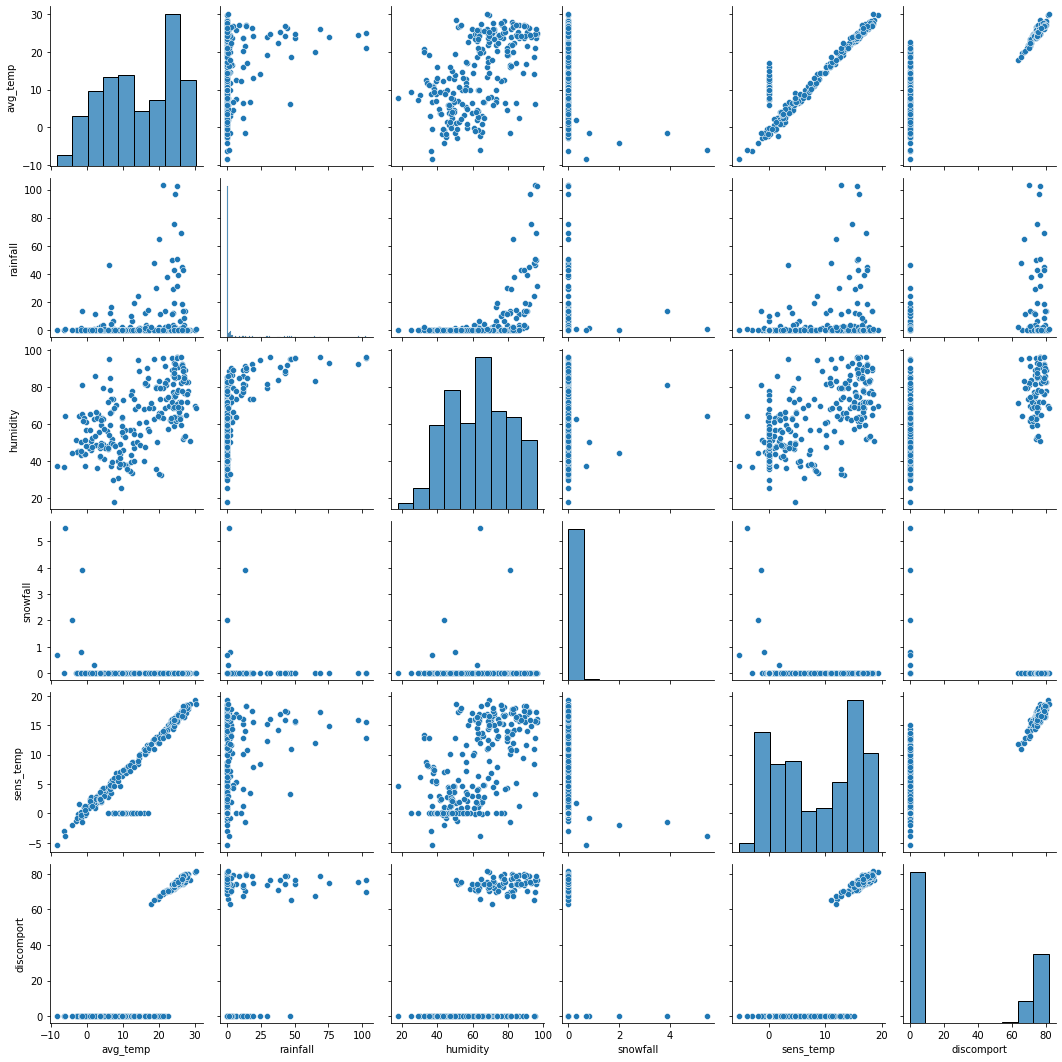

In [50]:
sns.pairplot(weather_df1[['avg_temp', 'rainfall', 'humidity', 'snowfall', 'sens_temp', 'discomport']]);

In [51]:
lm = sm.OLS(weather_df1['deliv'].astype(float), weather_df1[['avg_temp', 'rainfall', 'humidity', 'snowfall', 'sens_temp', 'discomport']].astype(float))
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  deliv   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              516.4
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                   2.18e-133
Time:                        19:00:57   Log-Likelihood:                         -2106.8
No. Observations:                 244   AIC:                                      4226.
Df Residuals:                     238   BIC:                                      4247.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avg_temp      54.8529     24.266      2.260      0.025       7.049     102.657
rainfall     -27.5864      6.001     -4.597      0.000     -39.408     -15.765
humidity      83.6045      3.228     25.899      0.000      77.245      89.964
snowfall     -73.8737    204.911     -0.361      0.719    -477.545     329.798
sens_temp    -73.3233     36.526     -2.007      0.046    -145.278      -1.368
discomport   -17.8835      4.605     -3.883      0.000     -26.956      -8.811
==============================================================================
Omnibus:                        0.883   Durbin-Watson:                   1.022
Prob(Omnibus):                  0.643   Jarque-Bera (JB):                0.816
Skew:                           0.141   Prob(JB):                        0.665
Kurtosis:                       2.986   Cond. No.                         181.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

강수량(rainfall), 적설량(snowfall), 체감온도(sens_temp), 불쾌지수(discomport)의 coef가 음수이다. 즉, 4개 항목과 배달(deliv)이 음의 상관 관계를 갖는다는 뜻이다. 항목들의 값이 높을수록 배달은 떨어진다.

In [52]:
lm = sm.OLS(weather_df1['deliv'].astype(float), weather_df1[['rainfall']].astype(float))
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  deliv   R-squared (uncentered):                   0.107
Model:                            OLS   Adj. R-squared (uncentered):              0.104
Method:                 Least Squares   F-statistic:                              29.23
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                    1.54e-07
Time:                        19:00:57   Log-Likelihood:                         -2415.1
No. Observations:                 244   AIC:                                      4832.
Df Residuals:                     243   BIC:                                      4836.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rainfall      98.4414     18.209      5.406      0.000      62.573     134.309
==============================================================================
Omnibus:                      166.936   Durbin-Watson:                   0.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1505.968
Skew:                          -2.689   Prob(JB):                         0.00
Kurtosis:                      13.918   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
lm = sm.OLS(weather_df1['deliv'].astype(float), weather_df1[['snowfall']].astype(float))
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  deliv   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):              0.009
Method:                 Least Squares   F-statistic:                              3.220
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                      0.0740
Time:                        19:00:57   Log-Likelihood:                         -2427.3
No. Observations:                 244   AIC:                                      4857.
Df Residuals:                     243   BIC:                                      4860.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
snowfall    1278.1156    712.289      1.794      0.074    -124.933    2681.165
==============================================================================
Omnibus:                       87.854   Durbin-Watson:                   0.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.658
Skew:                          -1.231   Prob(JB):                    1.12e-132
Kurtosis:                      10.329   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
lm = sm.OLS(weather_df1['deliv'].astype(float), weather_df1[['sens_temp']].astype(float))
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  deliv   R-squared (uncentered):                   0.585
Model:                            OLS   Adj. R-squared (uncentered):              0.583
Method:                 Least Squares   F-statistic:                              342.3
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                    2.72e-48
Time:                        19:00:57   Log-Likelihood:                         -2321.7
No. Observations:                 244   AIC:                                      4645.
Df Residuals:                     243   BIC:                                      4649.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sens_temp    351.1198     18.977     18.502      0.000     313.739     388.500
==============================================================================
Omnibus:                      115.457   Durbin-Watson:                   0.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.497
Skew:                           0.046   Prob(JB):                     0.000711
Kurtosis:                       1.809   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
lm = sm.OLS(weather_df1['deliv'].astype(float), weather_df1[['discomport']].astype(float))
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  deliv   R-squared (uncentered):                   0.352
Model:                            OLS   Adj. R-squared (uncentered):              0.349
Method:                 Least Squares   F-statistic:                              131.9
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                    1.13e-24
Time:                        19:00:57   Log-Likelihood:                         -2376.1
No. Observations:                 244   AIC:                                      4754.
Df Residuals:                     243   BIC:                                      4758.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
discomport    66.1627      5.761     11.484      0.000      54.815      77.511
==============================================================================
Omnibus:                      415.053   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.051
Skew:                          -0.363   Prob(JB):                     5.99e-06
Kurtosis:                       1.644   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

하지만 배달과 강수량, 강설량, 체감온도와 불쾌지수만 따로 OLS 회귀를 하면 양의 상관관계를 보인다. 즉 실제로 양의 상관 관계를 갖지만 다중공선성으로 인해 회귀 결과가 잘못나온것으로 보인다.

# 배달 그래프

In [56]:
deliv_case

[[20200101,
  3,
  96,
  848,
  188,
  455,
  137,
  76,
  1822,
  637,
  507,
  545,
  533,
  177,
  6024],
 [20200102,
  31,
  137,
  706,
  118,
  261,
  74,
  42,
  1069,
  304,
  377,
  288,
  295,
  68,
  3770],
 [20200103,
  32,
  91,
  715,
  140,
  351,
  92,
  39,
  1496,
  380,
  465,
  303,
  403,
  115,
  4622],
 [20200104,
  13,
  100,
  888,
  206,
  439,
  130,
  57,
  1593,
  497,
  565,
  420,
  536,
  180,
  5624],
 [20200105,
  2,
  135,
  910,
  240,
  431,
  164,
  72,
  1510,
  529,
  589,
  464,
  512,
  133,
  5691],
 [20200106,
  56,
  214,
  1428,
  300,
  430,
  168,
  74,
  2136,
  556,
  836,
  468,
  792,
  198,
  7656],
 [20200107,
  25,
  114,
  795,
  140,
  338,
  63,
  52,
  1471,
  331,
  492,
  319,
  462,
  110,
  4712],
 [20200108,
  24,
  128,
  710,
  136,
  287,
  63,
  47,
  1167,
  248,
  391,
  251,
  348,
  68,
  3868],
 [20200109, 34, 96, 681, 140, 307, 75, 59, 1364, 303, 421, 262, 374, 86, 4202],
 [20200110,
  22,
  104,
  749,
  134,
  

In [57]:
deliv_df = pd.DataFrame(deliv_case)
deliv_df.columns = [
    'date', 'lunchbox','j_food','bunsik','asian','jokbal', 'c_food','steamed',
    'chicken','dissert', 'junk_food', 'pizza', 'k_food', 'sushi', 'total']

deliv_df

,date,lunchbox,j_food,bunsik,asian,jokbal,c_food,steamed,chicken,dissert,junk_food,pizza,k_food,sushi,total
0,20200101,3,96,848,188,455,137,76,1822,637,507,545,533,177,6024
1,20200102,31,137,706,118,261,74,42,1069,304,377,288,295,68,3770
2,20200103,32,91,715,140,351,92,39,1496,380,465,303,403,115,4622
3,20200104,13,100,888,206,439,130,57,1593,497,565,420,536,180,5624
4,20200105,2,135,910,240,431,164,72,1510,529,589,464,512,133,5691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,20200827,50,249,646,88,558,127,60,1440,320,622,236,465,66,4927
240,20200828,40,268,678,109,614,156,78,1851,656,746,264,566,118,6144
241,20200829,24,340,778,112,858,181,114,2193,856,812,430,692,132,7522
242,20200830,13,274,636,99,779,271,84,2175,836,831,438,654,113,7203


In [58]:
deliv_df1 = deliv_df
del deliv_df1['date']
del deliv_df1['total']

In [59]:
deliv_df

,lunchbox,j_food,bunsik,asian,jokbal,c_food,steamed,chicken,dissert,junk_food,pizza,k_food,sushi
0,3,96,848,188,455,137,76,1822,637,507,545,533,177
1,31,137,706,118,261,74,42,1069,304,377,288,295,68
2,32,91,715,140,351,92,39,1496,380,465,303,403,115
3,13,100,888,206,439,130,57,1593,497,565,420,536,180
4,2,135,910,240,431,164,72,1510,529,589,464,512,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,50,249,646,88,558,127,60,1440,320,622,236,465,66
240,40,268,678,109,614,156,78,1851,656,746,264,566,118
241,24,340,778,112,858,181,114,2193,856,812,430,692,132
242,13,274,636,99,779,271,84,2175,836,831,438,654,113


In [60]:
print(deliv_df1)

     lunchbox  j_food  bunsik  asian  jokbal  c_food  steamed  chicken  \
0           3      96     848    188     455     137       76     1822   
1          31     137     706    118     261      74       42     1069   
2          32      91     715    140     351      92       39     1496   
3          13     100     888    206     439     130       57     1593   
4           2     135     910    240     431     164       72     1510   
..        ...     ...     ...    ...     ...     ...      ...      ...   
239        50     249     646     88     558     127       60     1440   
240        40     268     678    109     614     156       78     1851   
241        24     340     778    112     858     181      114     2193   
242        13     274     636     99     779     271       84     2175   
243        46     296     593     93     444     163       52     1478   

     dissert  junk_food  pizza  k_food  sushi  
0        637        507    545     533    177  
1        304   

<AxesSubplot:>

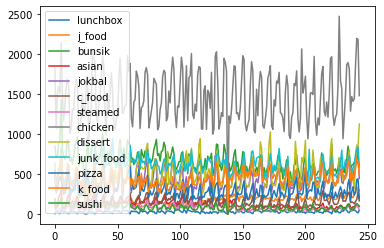

In [61]:
deliv_df1.plot.line()

# 요일별 배달음식 주문 건수

<AxesSubplot:>

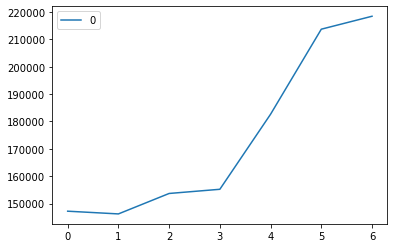

In [62]:
deliv_df2 = pd.DataFrame(deliv_total)
deliv_df2.plot.line()

데이터를 보면 화요일에 배달주문이 제일 적고 일요일에 가장 많다

In [63]:
lunchbox_df = pd.DataFrame(lunchbox_total)
j_food_df = pd.DataFrame(j_food_total)
bunsik_df = pd.DataFrame(bunsik_total)
asian_df = pd.DataFrame(asian_total)
jokbal_df = pd.DataFrame(jokbal_total)
c_food_df = pd.DataFrame(c_food_total)
steamed_df = pd.DataFrame(steamed_total)
chicken_df = pd.DataFrame(chicken_total)
dissert_df = pd.DataFrame(dissert_total)
junk_food_df = pd.DataFrame(junk_food_total)
pizza_df = pd.DataFrame(pizza_total)
k_food_df = pd.DataFrame(k_food_total)
sushi_df = pd.DataFrame(sushi_total)

# 요일별 카테고리 배달 총 건수

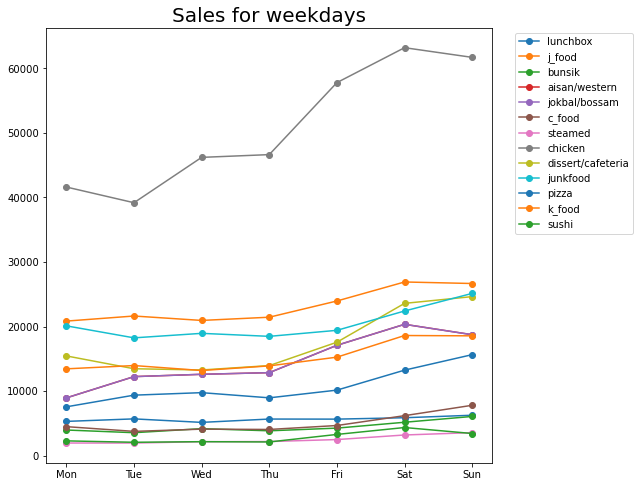

In [64]:
import matplotlib.pyplot as plt

df = pd.DataFrame()
df['days'] = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

days = df['days']
lunchbox_sale = lunchbox_df[0]
j_food_sale = j_food_df[0]
bunsik_sale = bunsik_df[0]
asian_sale = asian_df[0]
jokbal_sale = jokbal_df[0]
c_food_sale = c_food_df[0]
steamed_sale = steamed_df[0]
chicken_sale = chicken_df[0]
dissert_sale = dissert_df[0]
junk_food_sale = junk_food_df[0]
pizza_sale = pizza_df[0]
k_food_sale = k_food_df[0]
sushi_sale = sushi_df[0]
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white') 
ax = fig.add_subplot() 
 
ax.plot(days,lunchbox_sale,marker='o',label='lunchbox')
ax.plot(days,j_food_sale,marker='o',label='j_food') 
ax.plot(days,bunsik_sale,marker='o',label='bunsik') 
ax.plot(days,asian_sale,marker='o',label='aisan/western') 
ax.plot(days,jokbal_sale,marker='o',label='jokbal/bossam') 
ax.plot(days,c_food_sale,marker='o',label='c_food') 
ax.plot(days,steamed_sale,marker='o',label='steamed') 
ax.plot(days,chicken_sale,marker='o',label='chicken') 
ax.plot(days,dissert_sale,marker='o',label='dissert/cafeteria') 
ax.plot(days,junk_food_sale,marker='o',label='junkfood') 
ax.plot(days,pizza_sale,marker='o',label='pizza') 
ax.plot(days,k_food_sale,marker='o',label='k_food') 
ax.plot(days,sushi_sale,marker='o',label='sushi') 
ax.legend()
 
plt.title('Sales for weekdays',fontsize=20) 
plt.legend( bbox_to_anchor=(1.04, 1))
plt.show()

In [155]:
jokbal_df

,0
0,8946
1,12239
2,12597
3,12853
4,17087
5,20339
6,18731


In [65]:
season_lunchbox = pd.DataFrame(season_lunchbox)
season_j_food = pd.DataFrame(season_j_food)
season_bunsik = pd.DataFrame(season_bunsik)
season_asian = pd.DataFrame(season_asian)
season_jokbal = pd.DataFrame(season_jokbal)
season_c_food = pd.DataFrame(season_c_food)
season_steamed = pd.DataFrame(season_steamed)
season_chicken = pd.DataFrame(season_chicken)
season_dissert = pd.DataFrame(season_dissert)
season_junk_food = pd.DataFrame(season_junk_food)
season_pizza = pd.DataFrame(season_pizza)
season_k_food = pd.DataFrame(season_k_food)
season_sushi = pd.DataFrame(season_sushi)

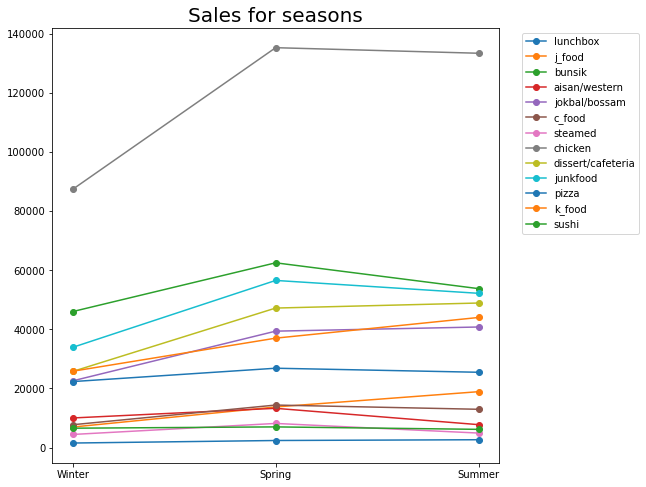

In [66]:
import matplotlib.pyplot as plt

df = pd.DataFrame()
df['seasons'] = ['Winter','Spring','Summer']

seasons = df['seasons']
season_lunchbox = season_lunchbox[0]
season_j_food = season_j_food[0]
season_bunsik = season_bunsik[0]
season_asian = season_asian[0]
season_jokbal = season_jokbal[0]
season_c_food = season_c_food[0]
season_steamed = season_steamed[0]
season_chicken = season_chicken[0]
season_dissert = season_dissert[0]
season_junk_food = season_junk_food[0]
season_pizza = season_pizza[0]
season_k_food = season_k_food[0]
season_sushi = season_sushi[0]
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white') 
ax = fig.add_subplot() 
 
ax.plot(seasons,season_lunchbox,marker='o',label='lunchbox')
ax.plot(seasons,season_j_food,marker='o',label='j_food') 
ax.plot(seasons,season_bunsik,marker='o',label='bunsik') 
ax.plot(seasons,season_asian,marker='o',label='aisan/western') 
ax.plot(seasons,season_jokbal,marker='o',label='jokbal/bossam') 
ax.plot(seasons,season_c_food,marker='o',label='c_food') 
ax.plot(seasons,season_steamed,marker='o',label='steamed') 
ax.plot(seasons,season_chicken,marker='o',label='chicken') 
ax.plot(seasons,season_dissert,marker='o',label='dissert/cafeteria') 
ax.plot(seasons,season_junk_food,marker='o',label='junkfood') 
ax.plot(seasons,season_pizza,marker='o',label='pizza') 
ax.plot(seasons,season_k_food,marker='o',label='k_food') 
ax.plot(seasons,season_sushi,marker='o',label='sushi') 
ax.legend()
 
plt.title('Sales for seasons',fontsize=20) 
plt.legend( bbox_to_anchor=(1.04, 1))
plt.show()

계절을 3달 간격의 고정된 기간으로 간주해와서 이번 프로젝트에서도 똑같은 기준으로 계절을 분류했다. 다만 데이터가 1월부터 8월까지의 데이터가 있어서 겨울(1 ~ 2), 봄(3 ~ 5), 여름(6 ~ 8)로 가을의 데이터가 없고 겨울은 봄과 여름보다 1달의 데이터가 적다

그 점을 감안하고 볼 때 코로나는 12월 달에 중국에서 부터 시작되었지만 한국에서 본격화 된것은 2월 달 부터라고 볼 수 있다. 실제로 모든 카테고리별 배달 주문 건수가 겨울보다 봄에 일정 부분 상승한 것을 확인할 수 있다. 하지만 물론 겨울의 경우 데이터가 다른 계절에 비해 1달이 부족해 생긴 오차도 감안해야한다. 다만 봄과 여름의 데이터를 보면 상승한 카테고리가 있는 반면 하락한 카테고리 또한 있는데 3월달에 1차 대유행이 시작되고 배달량이 증가하였지만 이후 4월 부터 8월 초까지 평균 확진자 수가 대부분 50명 미만이었다. 따라서 사람들의 외출이 봄에 적어졌다가 여름부터 다시 증가했다고 생각되는데 2차 대유행이 8월 13일 부터 103명의 확진자가 발생하면서 시작되었다. 하지만 데이터에 8월 31일 까지의 데이터만 사용한 관계로 2차 대유행과 배달 주문건수간의 상관관계를 찾기에는 부족하다고 생각된다.

In [67]:
weather_df = pd.DataFrame(weather).T
weather_df = weather_df.transpose()
weather_df.columns = ['지점명','date','avg_temp',
              'rainfall','avg_wspeed',
              'humidity','snowfall',
              'sens_temp','discomport']
del weather_df['지점명']
weather_df

,date,avg_temp,rainfall,avg_wspeed,humidity,snowfall,sens_temp,discomport
0,20200101,-2.2,0.1,0.6,64.4,0,1.64,0
1,20200102,1,0,1.2,65.4,0,2.44,0
2,20200103,-0.1,0,1.7,56.9,0,1.11,0
3,20200104,1.2,0,1.9,50.8,0,1.71,0
4,20200105,1.3,0,1.1,45.6,0,2.79,0
...,...,...,...,...,...,...,...,...
239,20200827,27.1,8.7,3.6,84.6,0,16.49,78.85
240,20200828,27.3,13.6,1.6,89.1,0,18.26,79.75
241,20200829,26.8,13.6,1.3,90.1,0,18.33,79.03
242,20200830,26.8,42.5,2.1,88.8,0,17.42,78.87


In [68]:
weather_df2 = weather_df

In [69]:
weather_df2.insert(8, 'chicken_deliv', deliv_df1['chicken'])

In [70]:
weather_df2

,date,avg_temp,rainfall,avg_wspeed,humidity,snowfall,sens_temp,discomport,chicken_deliv
0,20200101,-2.2,0.1,0.6,64.4,0,1.64,0,1822
1,20200102,1,0,1.2,65.4,0,2.44,0,1069
2,20200103,-0.1,0,1.7,56.9,0,1.11,0,1496
3,20200104,1.2,0,1.9,50.8,0,1.71,0,1593
4,20200105,1.3,0,1.1,45.6,0,2.79,0,1510
...,...,...,...,...,...,...,...,...,...
239,20200827,27.1,8.7,3.6,84.6,0,16.49,78.85,1440
240,20200828,27.3,13.6,1.6,89.1,0,18.26,79.75,1851
241,20200829,26.8,13.6,1.3,90.1,0,18.33,79.03,2193
242,20200830,26.8,42.5,2.1,88.8,0,17.42,78.87,2175


In [71]:
lm = sm.OLS(weather_df2['chicken_deliv'].astype(float), weather_df1[['avg_temp', 'rainfall', 'humidity', 'snowfall', 'sens_temp', 'discomport']].astype(float))
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          chicken_deliv   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              462.8
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                   3.70e-128
Time:                        19:00:59   Log-Likelihood:                         -1820.2
No. Observations:                 244   AIC:                                      3652.
Df Residuals:                     238   BIC:                                      3673.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avg_temp      21.3063      7.496      2.842      0.005       6.540      36.073
rainfall      -8.1448      1.854     -4.394      0.000     -11.797      -4.493
humidity      24.1142      0.997     24.183      0.000      22.150      26.079
snowfall     -63.8097     63.298     -1.008      0.314    -188.505      60.886
sens_temp    -28.3423     11.283     -2.512      0.013     -50.569      -6.115
discomport    -4.9599      1.423     -3.486      0.001      -7.762      -2.157
==============================================================================
Omnibus:                        6.148   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                8.224
Skew:                          -0.154   Prob(JB):                       0.0164
Kurtosis:                       3.845   Cond. No.                         181.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
lm = sm.OLS(weather_df2['chicken_deliv'].astype(float), weather_df1[['rainfall']].astype(float))
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          chicken_deliv   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.103
Method:                 Least Squares   F-statistic:                              28.96
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                    1.74e-07
Time:                        19:00:59   Log-Likelihood:                         -2116.2
No. Observations:                 244   AIC:                                      4234.
Df Residuals:                     243   BIC:                                      4238.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rainfall      28.7885      5.350      5.381      0.000      18.251      39.326
==============================================================================
Omnibus:                      162.146   Durbin-Watson:                   0.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1340.318
Skew:                          -2.625   Prob(JB):                    8.99e-292
Kurtosis:                      13.211   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
lm = sm.OLS(weather_df2['chicken_deliv'].astype(float), weather_df1[['discomport']].astype(float))
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          chicken_deliv   R-squared (uncentered):                   0.356
Model:                            OLS   Adj. R-squared (uncentered):              0.353
Method:                 Least Squares   F-statistic:                              134.1
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                    5.50e-25
Time:                        19:00:59   Log-Likelihood:                         -2076.3
No. Observations:                 244   AIC:                                      4155.
Df Residuals:                     243   BIC:                                      4158.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
discomport    19.5329      1.687     11.581      0.000      16.210      22.855
==============================================================================
Omnibus:                      222.004   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.880
Skew:                          -0.387   Prob(JB):                     1.08e-05
Kurtosis:                       1.715   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
del weather_df1['deliv']

<AxesSubplot:>

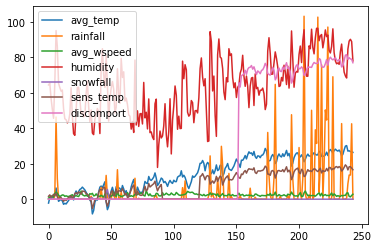

In [160]:
weather_df1.plot.line()

<AxesSubplot:>

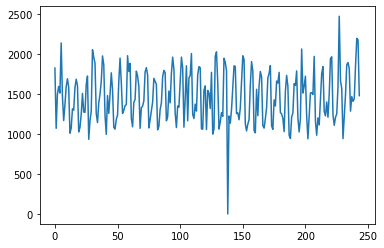

In [161]:
deliv_df['chicken'].plot.line()